# 신경망의 사용처
- 분류 ; 보통 softmax 함수
- 회귀 ; 보통 항등함수
- 사용처에 따라 출력층에서 사용하는 활성화 함수가 달라진다.

In [ ]:
# 항등 함수
# 입력값 -> 그대로 출력
def identity_function(x):
  return x

## softmax 함수
$\begin{align}
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}
\end{align}$
- $n$ : 출력층의 뉴런의 갯수
- $y_k$ : 출력층 뉴런의 k번째 출력

In [ ]:
# softmax 함수 연습
import numpy as np

a = np.array([0.3, 2.9, 4.0])
# 입력값
exp_a = np.exp(a)
# 모든 입력값에 대해 지수함수(exp) 적용
print(a)
print(exp_a)

[0.3 2.9 4. ]
[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a = np.sum(exp_a)
# 분모가 될 모든 입력값에 대한 지수함수 합
print(sum_exp_a)

74.1221542101633


In [ ]:
# 이제 softmax 함수값 계산
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
# 각 입력값에 대해 지수함수를 적용시킨 후
# softmax 공식에 대입하여
# softmax 값을 구함

# softmax는 뉴런이 2개 이상일 때 사용.
# 출력값 : 각각의 클래스일 확률.

np.sum(y)  # 확률의 총합은 1

1.0

In [ ]:
# softmax를 함수로 저장하자
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

## softmax 함수의 문제점
- 지수함수를 사용하기 때문에 입력값이 조금만 커져도 출력값이 엄청나게 증가한다.
- log를 사용한다.
  - log는 복잡한 계산을 간단한 계산으로 바꿔준다.
  - log는 큰 수의 사이즈를 작게 줄여준다.
- $\begin{align}
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C\,exp(a_k)}{C\,\sum_{i=1}^n exp(a_i)} = \frac{exp(a_k+logC)}{\sum_{i=1}^n exp(a_i+logC)} = \frac{exp(a_k+C^\prime)}{\sum_{i=1}^n exp(a_i+C^\prime)} 
\end{align}$
- $C'$값은 보통 입력신호들 중 최댓값 사용 (오버플로를 막기 위해)

In [ ]:
# softmax 함수에도 단점이 있다.
# 지수함수를 사용하므로 입력값이 약간만 커져도 지수적으로 엄청나게 증가한다.
# e^1000만 되도 무한대를 의미하는 np.inf를 만들어낸다.
# 또한 이렇게 큰 값으로 나눗셈을 하는 것 자체가 불안정하다.

# 이러한 지수함수를 활용하기 때문에 발생하는 문제점을 해결해줄 필요가 있다.
# log의 개념을 활용하면 손쉽게 해결이 가능하다.

# log는 복잡한 계산을 간단한 계산으로 바꿔준다.
# log는 큰 수의 사이즈를 작게 줄여준다.

In [ ]:
# softmax 함수의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다.
# k번째 입력값 a_k에 더할 값인 c' 을 어떤 값으로 사용하던 상관없지만
# 오버플로를 막을 목적으로 입력 신호들 중 최댓값을 사용하는 것이 일반적이다.

In [ ]:
# softmax 함수의 문제점 예시
import numpy as np
a = np.array([1010, 1000, 990])  # 입력값
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)  # 입력값을 softmax를 취한 결과

[nan nan nan]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
# 이렇게 1000 근처의 값들만 넣어도
# overflow라면서 계산하지 못하고
# [nan nan nan] 으로 제대로 출력하지 못하고 있다.

# 입력 특성의 최댓값을 C'으로 해서
# a-C'을 입력값으로 대신 사용해보자.

## softmax 함수의 특징
- 지수함수를 계산할 때 어떤 정수를 더하거나, 빼도 결과는 변하지 않는다.
- softmax 함수 결과값 : 배열
- 배열의 원소들 : 0~1 사이의 실수 (각 클래스일 확률)
- 원소들의 총 합 : 1
- 출력값 중 가장 큰 위치의 클래스로 분류가 된다.
- 입력값의 대소관계 = 출력값의 대소관계

In [ ]:
# 입력값을 a 대신에 a-C'을 사용하도록 하자.
# C'은 보통 a값들의 최댓값을 사용한다.
c = np.max(a)
print(a-c)

[  0 -10 -20]


In [ ]:
new_x = a - c
new_exp_x = np.exp(new_x)
sum_new_exp_x = np.sum(new_exp_x)
y = new_exp_x / sum_new_exp_x
print(y)  # 변화된 입력값을 softmax 함수 안에 넣은 결과값

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [ ]:
# 이번에는 정상적으로 잘 구해졌다

In [ ]:
# 이를 토대로 softmax 함수를 다시 정의하자.
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
print(np.sum(y))  # 확률의 총 합 : 1

1.0


In [ ]:
# 위의 결과물을 분석해보자
# 출력값 : [0.01821127 0.24519181 0.73659691]

# 0번 클래스가 될 확률 : 1.8%
# 1번 클래스가 될 확률 : 24.5%
# 2번 클래스가 될 확률 : 74.7%

# 이렇게 확률적인 결론을 낼 수 있다.
# 즉, softmax 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것이다.

In [ ]:
# 입력값의 대소관계 = 출력값의 대소관계. 변하지 않음.
# 지수함수가 단조함수이기 때문.

# 신경망을 이용한 분류에서
# 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식된다.

# 그런데 softmax 함수를 출력층의 함수로 사용하게 된다면
# 원래의 입력값의 대소관계를 알고 있기 때문에
# softmax 함수를 취한 후의 대소관계도 동일.
# 따라서 출력층의 활성화 함수를 softmax를 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 변화되지 않는다.
# 출력층의 softmax 함수를 생략해도 된다.

In [ ]:
# 그렇다면 왜 굳이 softmax 함수를 배웠는가?

# 기계학습(머신러닝)의 문제 풀이는 학습과 추론. 두 단계를 거치기 때문이다.

# 학습 단계 - 모델 학습
# 추론 단계 - 학습한 모델로 미지의 데이터에 대해 추론(분류)

# 추론 단계에서는 softmax 함수를 생략하는 것이 일반적
# 단, 신경망을 학습시킬 때는 출력층에서 softmax를 사용

In [ ]:
# 출력층의 뉴런의 갯수 : 분류문제에서 분류하고 싶은 클래스의 갯수
# ex) 0~9까지 숫자로 분류 -> 출력층 뉴런의 갯수 : 10개

In [ ]:
# 손글씨 필기체 숫자 인식

# 추론(분류)하는 과정만 구현해보자.

# 순전파 : 앞에서 뒤로 순서대로 이동하며 추론하는 과정

## MNIST 손글씨 데이터셋
- 훈련 데이터셋 : 60000개
- 테스트 데이터셋 : 10000개
- 이미지 사이즈 : 28*28px(각 픽셀은 0~255까지의 값을 취함)
- 각 이미지당 label이 숫자로 붙어 있음

In [ ]:
import sys, os
sys.path.append(os.pardir)
# 현재 디렉토리의 부모 디렉토리의 파일을 가지고 올 수 있도록 설정

In [ ]:
# 디렉토리에 mnist.py 파일을 넣어서 가져올 수도 있지만
# tensorflow.keras의 datasets 안에서 mnist 데이터셋을 불러오자.

import tensorflow as tf
from tensorflow.keras import datasets

mnist = datasets.mnist

### dataset 로드

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 훈련 데이터셋 / 테스트 데이터셋 가져오기

### shape 확인
- 제일 중요!
- 데이터의 shape 가 맞지 않으면 훈련이 되지 X
- 데이터 양의 변화(추가, 삭제 등)이 있으면 바로 shape를 확인해봐야 한다.

In [ ]:
# shape 확인해보기
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# 훈련 데이터셋의 갯수 : 60000개
# 테스트 데이터셋의 갯수 : 10000개

# 이미지 사이즈  : 28 * 28

# 채널의 수 : 1 (gray scale 이미지)
# 만약 채널의 수 : 3 -> RGB 이미지

### 이미지 확인

In [ ]:
# 이미지가 잘 불러와졌나 확인해보기
img = X_train[0]
print(img)
print(img.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
img.shape

(28, 28)

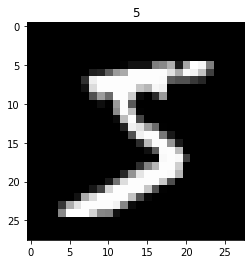

In [ ]:
# 이미지 시각화
label = y_train[0]

import matplotlib.pyplot as plt
plt.imshow(img, "gray")
plt.title(label)  # 위에 title을 적어서 보이는 이미지의 정답을 같이 확인할 수 있다.
plt.show()

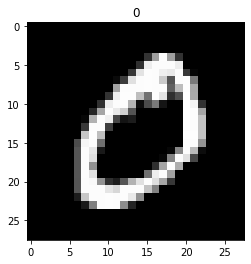

In [ ]:
img1 = X_train[1]
label1 = y_train[1]

plt.imshow(img1, "gray")
plt.title(label1)  # 위에 title을 적어서 보이는 이미지의 정답을 같이 확인할 수 있다.
plt.show()

### 분류 신경망 구현 - Fully Connected Layer
- 신경망에 넣을 준비
- 데이터를 넣을 신경망의 종류 : Fully Connected Layer
  - fully connected layer에서는 지금까지 처리된 결과데이터를 가진 모든 노드를 연결시켜 1차원 배열로 풀어서 표시
  - 데이터가 1차원 형식으로 쭉 펼쳐져 있어야 함(flatten)
  - 그 정보들을 이용해서 분류 수행

In [ ]:
# 입력값 : 28*28 = 784 (각 픽셀 하나하나의 입력을 받음)
# 출력층 : 10개 (숫자 0~9로 분류)

# 은닉층 2개
# 1번째 은닉층 : 뉴런 50개
# 2번째 은닉층 : 뉴런 100개

In [ ]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
img = img.reshape(-1)
# 1차원의 데이터로 1자로 쭉 펼쳐지게 shape 변경
img

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
img.shape

(784,)

In [ ]:
# (784, ) 로 1차원 데이터로 가로로 쭉 펼쳐졌다.

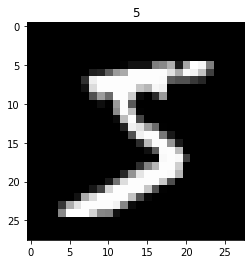

In [ ]:
# 복구를 했을 때도 잘 이미지가 복구 되는 지 알아보자.
img_bokgu = img.reshape(28, 28)
import matplotlib.pyplot as plt
plt.imshow(img_bokgu, "gray")
plt.title(label)
plt.show()

In [ ]:
# 이미지를 1차원 데이터로 가로로 쭉 펼쳤다가
# 다시 reshape 함수를 이용해서
# 원래대로 28*28의 형태로 바꾸더라도
# 이미지의 손상 없이 잘 보여지는 것을 알 수 있다.

In [ ]:
# 이제 본격적으로 Fully Connected 신경망을 만들어보자.

In [ ]:
# sigmoid 활성화함수, softmax 활성화 함수 구현하자.
import numpy as np
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [ ]:
# 신경망 구현 - Fully Connected Layer

# 원래는 훈련 데이터를 모델에 넣고 훈련시킨 후,
# 그 모델에 테스트 데이터를 넣어서 정확도를 확인한다.

# 그런데 지금은 훈련하는 과정을 건너뛰고
# 훈련된 모델의 가중치와 편향을 가져와서
# 바로 테스트 데이터에 대한 정확도를 확인하도록 하자.

def init_network():
  import pickle  # 텍스트 파일이 아닌 다른 파이썬 파일은 pickle 모듈을 이용해서 저장/로드 가능하다.
  with open("./sample_weight.pkl", "rb") as f:  # read 바이너리. 읽겠다.
    network = pickle.load(f)  # 파일을 불러온다.
  
  return network  # 파일 내용이 불러와진다.

def predict(network, x):  # 신경망에서 사용할 훈련된 모델의 매개변수값들과 입력값을 받자.
  W1, W2, W3 = network["W1"], network["W2"], network["W3"]  # 파일에서 가중치를 가져오자.
  b1, b2, b3 = network["b1"], network["b2"], network["b3"]  # 파일에서 편향을 가져오자.

  # 각 층 별로 차례차례 layer를 구현해보자.
  # layer 1
  # 입력값 : x
  # 활성화함수 : sigmoid
  z1 = np.dot(x, W1) + b1
  a1 = sigmoid(z1)

  # layer 2
  # 입력값 : 이전 층의 출력값. a1
  # 활성화함수 : sigmoid
  z2 = np.dot(a1, W2) + b2
  a2 = sigmoid(z2)

  # layer 3
  # 입력값 : 이전 층의 출력값. a2
  # 활성화함수 : 출력층의 활성화함수는 softmax
  z3 = np.dot(a2, W3) + b3
  y = softmax(z3)

  return y

In [ ]:
# 신경망 구조를 다 구현했으니까
# 이제 테스트 데이터를 불러오자.
def get_test_data():
  (X_train, y_train), (X_test, y_Test) = mnist.load_data()
  # normalize=True 가 기본 설정값
  # 픽셀의 범위  : 0~255를 0~1로 축소시키는 MinMaxScaler 와 같은 역할을 한다. 
  # -> 데이터 전체의 분포를 균일하게 바꿔준다.
  # 전처리 과정을 자동으로 해주었다.
  
  # X_train의 shape는 (10000, 28, 28)로 fully connected layer에 넣으려면
  # 1차원으로 쭉 펼쳐야 한다.
  X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
  
  # 테스트 데이터를 출력해줘야 하니까
  # X_test_reshaped, y_test를 return 해주자
  return X_test_reshaped, y_test

In [ ]:
# 이제 테스트 데이터를 가져와서
# 훈련된 모델이 테스트 데이터를 얼마나 잘 분류해내는지 정확도를 구해보자.

# 신경망의 파라미터들 가져오기
network = init_network()
# 파라미터들의 shape 확인하기
W1, W2, W3 = network["W1"], network["W2"], network["W3"]
b1, b2, b3 = network["b1"], network["b2"], network["b3"]

print(W1.shape, W2.shape, W3.shape)
print(b1.shape, b2.shape, b3.shape)

(784, 50) (50, 100) (100, 10)
(50,) (100,) (10,)


In [ ]:
# shape 확인 결과 행렬의 곱이 가능하겠다.

# 1층 레이어의 뉴런의 갯수 : 50개
# 2층 레이어의 뉴런의 갯수 : 100개
# 3층 레이어(출력층)의 뉴런의 갯수 : 10개 - 0~9까지의 숫자로 분류. label의 갯수 : 10개

In [ ]:
# 이제 진짜로 테스트 데이터에 대해 정확도를 구해보자.

Xtest, Ytest = get_test_data()
network = init_network()
yprediction = predict(network, Xtest)  # 신경망에 테스트 데이터를 넣어 예측값을 구한다.
yprediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


array([[1.8234791e-09, 1.9446912e-10, 7.8615038e-08, ..., 4.2491962e-04,
        1.6188402e-10, 2.2574166e-07],
       [8.7074472e-09, 2.7697226e-08, 2.3823570e-05, ..., 6.4393625e-12,
        6.9177450e-09, 9.9881759e-14],
       [5.5241829e-15, 3.9871162e-04, 5.1740578e-08, ..., 1.2315293e-09,
        4.5897004e-08, 1.4465404e-10],
       ...,
       [1.6297104e-12, 1.6991972e-10, 5.6855015e-10, ..., 2.0621647e-09,
        3.1935635e-08, 2.0217632e-07],
       [1.8567050e-09, 6.5277256e-10, 2.1762088e-10, ..., 5.7270751e-11,
        1.6993348e-06, 4.6346815e-10],
       [8.4324254e-09, 8.2065882e-11, 5.0769945e-08, ..., 1.5053432e-11,
        1.1685460e-10, 4.1043068e-11]], dtype=float32)

In [ ]:
yprediction.shape

(10000, 10)

In [ ]:
# 테스트 데이터가 총 10000개
# 분류할 label이 10종류이니까
# shape가 (10000, 10)으로 잘 나온 것 확인

### 정확도 확인

In [ ]:
# 정확도를 확인하기 위해
# 예측값 = 정답 조건을 만족할 때마다
# 갯수를 세주겠다.
accuracy_count = 0

# 사진을 1장씩 꺼낸다음
# 예측값 = 정답 조건을 만족하는지 for문을 돌려보자.
for i in range(len(Xtest)):
  yprediction = predict(network, Xtest[i])
  # 이 때, 
  # 신경망의 마지막 출력값이
  # 상수 1개로 나오는 것이 아니다.
  # softmax를 사용했기 때문에
  # 각각의 클래스.
  # 0~9번까지의 클래스 중 어느 클래스에 속할 확률이 제일 높은지를 확인하기 위해
  # 각 클래스에 속할 확률을 배열로 출력해준다.
  # 따라서 그 중 확률이 제일 높게 나오는 index의 클래스에 들어간다고 예측을 한다는 것이다.

  yprediction_index = np.argmax(yprediction)
  # np.max(배열) : 그 배열 중 제일 큰 원소 출력
  # np.argmax(배열) : 그 배열 중 제일 큰 원소의 index 출력
  
  # 내가 원하는 것은 몇 번째 클래스로 분류를 하였는지!
  # np.argmax 사용.

  if yprediction_index == Ytest[i]:  
    # 예측한 클래스 = 정답 클래스
    accuracy_count += 1

print(float(accuracy_count) / len(Xtest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.9207


In [ ]:
# 정확도 : 92.07%가 나왔다.

# 꽤나 정확하게 정답을 맞추고 있다.

In [ ]:
# 하지만, 이 방법의 단점이 있다.

# 테스트의 데이터의 갯수만큼 for루프문이 돌아야 한다.

# 그렇다면, 좀 더 빠르게 할 수 있는 방법이 없을까?

In [ ]:
# 문제집을 풀고나서 답안지를 보며 내 풀이를 채점할 때
# 한문제 한문제 답안을 보면서 채점하면 너무 오래걸린다.
# 답을 5개씩 순간적으로 외워서 5문제 채점하는 식으로 채점을 하면 좀 더 빨리 채점을 할 수가 있다.
# 묶음!

# 미니배치를 이용하자!

### 미니배치를 사용한 분류
- 미니배치 : 입력 데이터들의 묶음
- batch_size : 미니배치 1개당 들어있어야 하는 데이터의 갯수
- epoch : 미니배치를 활용해 모든 데이터를 다 학습을 1번 시키면 1 에폭(epoch)이라고 한다.
  - ex) 60000개의 데이터를 batch_size=100으로 묶게 되면
  - 100개씩 묶은 묶음이 600개.
  - 600개의 미니배치 데이터가 생긴다.
  - 미니배치를 활용해 60000개의 데이터를 모두 학습시키면, 1 epoch 이라고 한다.
- 이미지 1장당 처리 시간을 대폭 줄여준다.

In [ ]:
Xtest, ytest = get_test_data()
network = init_network()

batch_size = 100  # 100개씩 1묶음으로 묶자.
# 테스트 데이터의 갯수가 10000개이므로 100(=batch_size)개씩 묶으면 100개의 배치 데이터가 생긴다.
accuracy_cnt = 0
# 정확도 계산을 위해 맞춘 갯수

# 100개씩 한 묶음으로 묶어서 계산하기로 했다.
# 비교해보자.

for i in range(0, len(Xtest), batch_size):
  # 0번 인덱스부터 batch_size만큼씩 묶어서 그 묶음 하나씩 보자.
  # 여기서는 100개
  Xtest_batch = Xtest[i : i+batch_size]
  ytest_batch = predict(network, Xtest_batch)  
  # Xtest_batch.
  # 즉, 100개씩 잘라서 예측값을 구한다.
  
  # 간단하게 이야기 하면 X값과 예측값(y hat)
  
  y_pred_index = np.argmax(ytest_batch, axis=1)
  # ytest_batch. 즉, 100개씩 자른 배치 1개당
  # 가로를 기준으로 (2차원배열에서 axis=1 -> 0차원 데이터가 늘어나는 방향)
  # 가장 큰 값의 index 추출
  # 즉, ytest_batch에서 각 클래스에 속할 확률들의 배열로 나타나는 데
  # 그 중 확률이 제일 높은 index번째의 클래스로 분류를 했다는 것.

  accuracy_cnt += np.sum(y_pred_index == ytest[i : i+batch_size])
  # 예측값 = 정답
  # 일때마다 accuracy_cnt 를 높힌다.
  # 원래는 1씩 더해줬겠지만, 지금은 배치 방법을 사용해서
  # 데이터 100개씩 정답을 비교하는 중이니까 np.sum 이용
  # (문제집 풀이 채점할 때 정답 100개씩 외워서 정답 채점하는 것)

print(float(accuracy_cnt) / len(Xtest))  # 분류 정확도 확인

0.9207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [ ]:
# 아까와 동일한 정확도. 0.9207이 나왔다.
# 배치 방법을 이용해서 구해도 정확도는 동일하게 나온다는 뜻이다.

# 과연 시간차이는 어떻게 나는 지 확인해보자.

In [ ]:
import time
%time
accuracy_count = 0
for i in range(len(Xtest)):
  yprediction = predict(network, Xtest[i])
  yprediction_index = np.argmax(yprediction)
  if yprediction_index == Ytest[i]:  
    accuracy_count += 1
print(float(accuracy_count) / len(Xtest))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs
0.9207


In [ ]:
%time
Xtest, ytest = get_test_data()
network = init_network()
batch_size = 100 
accuracy_cnt = 0
for i in range(0, len(Xtest), batch_size):
  Xtest_batch = Xtest[i : i+batch_size]
  ytest_batch = predict(network, Xtest_batch)  
  y_pred_index = np.argmax(ytest_batch, axis=1)
  accuracy_cnt += np.sum(y_pred_index == ytest[i : i+batch_size])
print(float(accuracy_cnt) / len(Xtest))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 6.44 µs
0.9207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [ ]:
# 그냥 10000개의 데이터를 1개씩 예측값과 정답을 비교하는 데 걸린 시간보다
# 배치 방법을 이용해서 한번에 100개씩 예측값과 정답을 비교하는데 걸린 시간이 더 짧다.

In [ ]:
# 여기까지가 신경망의 순전파.
# 퍼셉트론과 신경망의 공통점 - 신경망의 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다.

# 퍼셉트론과 신경망의 차이점
# - 퍼셉트론 : 활성화함수로 계단 함수 사용
# - 신경망 : 활성화함수로 sigmoid 함수 사용 -> 이 차이가 신경망 학습에 매우 중요하다!